# D. Mohammad Abdulla
# BL.EN.U4AIE21044

Playing First Derivative Signal:


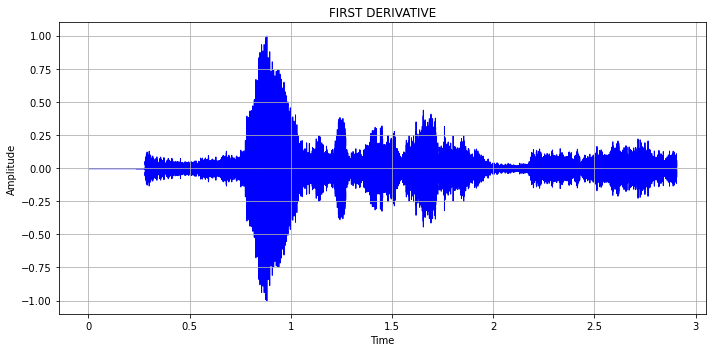

In [33]:
# A1

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

y, sr = librosa.load('Abdulla.mp3')
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))
print("Playing First Derivative Signal:")

plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=sr,color='blue')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
ipd.Audio(derivative_1, rate=sr)


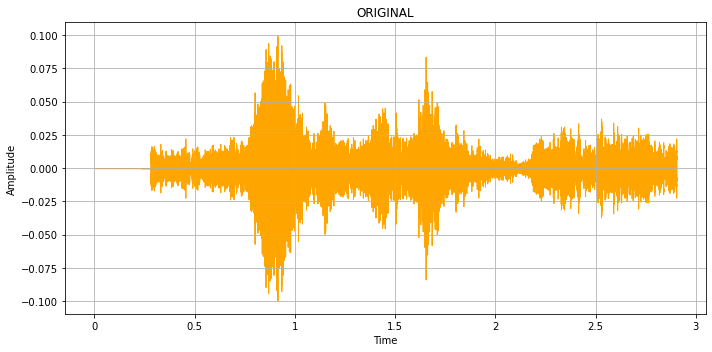

In [34]:
# ORIGINAL 
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr,color='orange')
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(y, rate=sr)


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 5.12616456247279


C:\Users\Abdulla\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Abdulla\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Abdulla\AppData\Local\Temp\ipykernel_9124\2675642994.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'blue')
C:\Users\Abdulla\AppData\Local\Temp\ipykernel_9124\2675642994.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo',

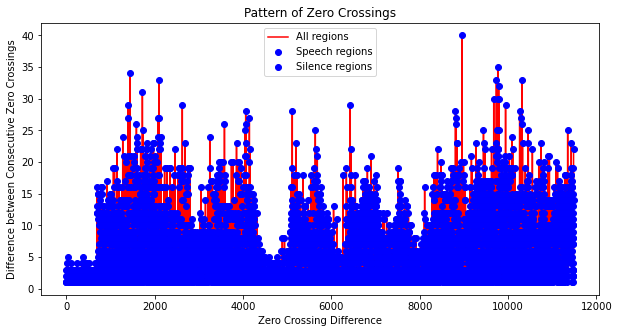

Pattern of Zero Crossings:
All regions: [ 3  1  2 ... 15 14 22]
Speech regions: []
Silence regions: [ 3  1  2 ... 15 14 22]


In [38]:
#A2

zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'blue')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'blue')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)


Lengths of the spoken words MINE: [2.246530612244898, 1.5933106575963718, 1.2015192743764171, 1.3843310657596373, 2.0375510204081633]
Lengths of the spoken words TeamMate: [1.7763265306122449, 1.2016326530612245, 1.3061224489795917, 1.2537414965986395, 1.5412244897959184]


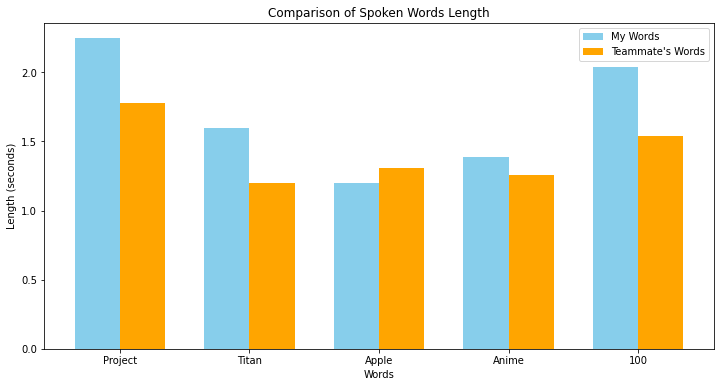

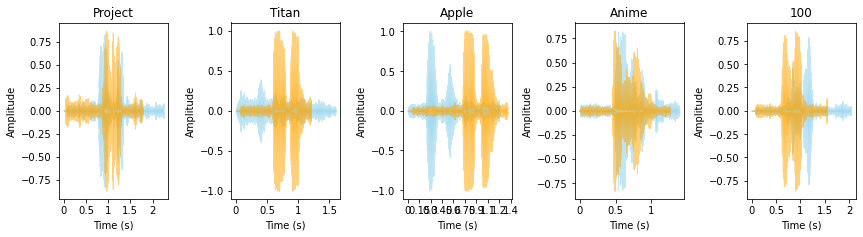

In [39]:
# A3

word_files_mine = ['Project_2.mp3', 'Titan_2.mp3', 'Apple_2.mp3', 'Anime_2.mp3', '100_2.mp3']
word_files_team_mate = ['Project_1.mp3', 'Titan_1.mp3', 'Apple_1.mp3', 'Anime_1.mp3', '100_1.mp3']
words = ['Project', 'Titan', 'Apple', 'Anime', '100']

word_lengths_mine = []
word_lengths_teammate = []
word_signals_mine = []
word_signals_team_mate = []

for word_file in word_files_mine:
    signal, sr = librosa.load(word_file, sr=None)
    word_signals_mine.append(signal)
    length_seconds = len(signal) / sr
    word_lengths_mine.append(length_seconds)

for word_file in word_files_team_mate:
    signal, sr = librosa.load(word_file, sr=None)
    word_signals_team_mate.append(signal)
    length_seconds = len(signal) / sr
    word_lengths_teammate.append(length_seconds)
    
print("Lengths of the spoken words MINE:", word_lengths_mine)
print("Lengths of the spoken words TeamMate:", word_lengths_teammate)

# Plot the bar chart comparing spoken word lengths
bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='skyblue')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='orange')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

# Plot the waveforms of spoken words side by side
plt.figure(figsize=(12, 6))
for i, (word, signal_mine, signal_team_mate) in enumerate(zip(words, word_signals_mine, word_signals_team_mate)):
    plt.subplot(2, len(words), i + 1)
    librosa.display.waveshow(signal_mine, sr=sr, color='skyblue', alpha=0.5)  # Blue for your signals
    librosa.display.waveshow(signal_team_mate, sr=sr, color='orange', alpha=0.5)  # Red for team-mate's signals
    plt.title(f'{word}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


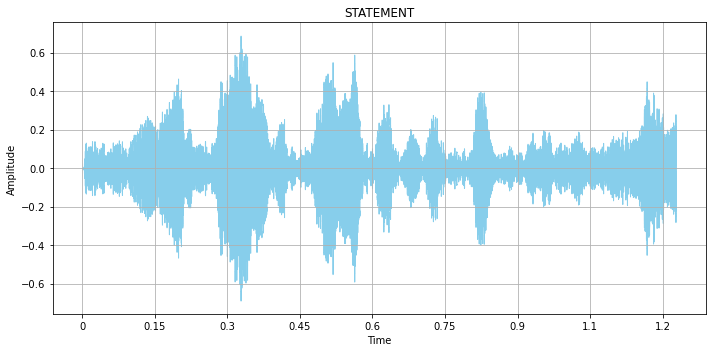

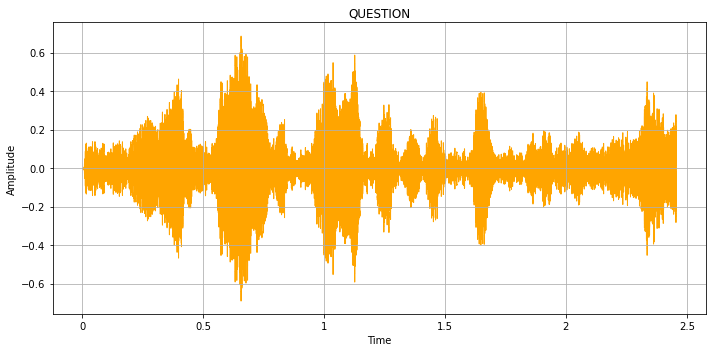

In [40]:
# A4

statement, sr1 = librosa.load('Statement.mp3')
question, sr2 = librosa.load('Question.mp3')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='skyblue')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

question, sr = librosa.load('Question.mp3')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='orange')
plt.title('QUESTION')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()